In [15]:
# Import necessary libraries
import os
import sys

# Add the scripts folder to the Python path
sys.path.append(os.path.abspath("../scripts"))
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from load_data import fetch_data
from data_aggregation import aggregate_user_data
from top_10_values_analysis import (
    top_10_values,
    bottom_10_values,
    most_frequent_values,
    improved_summary,
    improved_summary_v2,
    improved_summary_v3,
)
from visualizations import plot_throughput_distribution, plot_tcp_retransmission, plot_rtt_distribution

In [16]:

# SQL query to fetch data
query = "SELECT * FROM xdr_data ;"  

# Load the data
df = fetch_data(query)

d:\Kifya_training\Week 2\Telecom-User-Analysis-and-Dashboard-Development\scripts\load_data.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [17]:
#Apply aggregation (as already defined in data_aggregation)
aggregated_data = aggregate_user_data(df)
# Inspect aggregated data
aggregated_data.head()


,MSISDN/Number,average_rtt_dl,average_rtt_ul,average_bearer_tp_dl,average_bearer_tp_ul,average_tcp_dl_retrans,average_tcp_ul_retrans,handset_type
0,33601001722.00,46.00,0.00,37.00,39.00,16853393.74,624008.18,Huawei P20 Lite Huawei Nova 3E
1,33601001754.00,30.00,1.00,48.00,51.00,16853393.74,624008.18,Apple iPhone 7 (A1778)
2,33601002511.00,119.18,16.77,48.00,49.00,16853393.74,624008.18,Unknown
3,33601007832.00,69.00,15.00,204.00,44.00,1066.00,624008.18,Apple iPhone 5S (A1457)
4,33601008617.00,57.00,2.50,20197.50,8224.50,9349630.00,21202.00,Apple iPhone Se (A1723)


In [18]:
# Fill missing values without using inplace=True
df['TCP DL Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean())
df['TCP UL Retrans. Vol (Bytes)'] = df['TCP UL Retrans. Vol (Bytes)'].fillna(df['TCP UL Retrans. Vol (Bytes)'].mean())
df['Avg RTT DL (ms)'] = df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean())
df['Avg RTT UL (ms)'] = df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean())
df['Avg Bearer TP DL (kbps)'] = df['Avg Bearer TP DL (kbps)'].fillna(df['Avg Bearer TP DL (kbps)'].mean())
df['Avg Bearer TP UL (kbps)'] = df['Avg Bearer TP UL (kbps)'].fillna(df['Avg Bearer TP UL (kbps)'].mean())

# Replacing missing values in 'Handset Type' with the mode (most frequent value)
df['Handset Type'] = df['Handset Type'].fillna(df['Handset Type'].mode()[0])

# Check the DataFrame after handling missing values
print(df.head())


                Bearer Id            Start  Start ms              End  End ms  \
0 13114483460844900352.00   4/4/2019 12:01    770.00  4/25/2019 14:35  662.00   
1 13114483482878900224.00   4/9/2019 13:04    235.00   4/25/2019 8:15  606.00   
2 13114483484080500736.00   4/9/2019 17:42      1.00  4/25/2019 11:58  652.00   
3 13114483485442799616.00   4/10/2019 0:31    486.00   4/25/2019 7:36  171.00   
4 13114483499480700928.00  4/12/2019 20:10    565.00  4/25/2019 10:40  954.00   

   Dur. (ms)               IMSI  MSISDN/Number              IMEI  \
0 1823652.00 208201448079117.00 33664962239.00 35521209507511.00   
1 1365104.00 208201909211140.00 33681854413.00 35794009006359.00   
2 1361762.00 208200314458056.00 33760627129.00 35281510359387.00   
3 1321509.00 208201402342131.00 33750343200.00 35356610164913.00   
4 1089009.00 208201401415120.00 33699795932.00 35407009745539.00   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...  

In [33]:
# Adjust pandas display settings to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Now call the top_10_values function for the specified column
column_name = 'TCP DL Retrans. Vol (Bytes)'
if column_name in df.columns:
    try:
        print("Top 10 values for the column:")
        print(top_10_values(df, column_name))
    except Exception as e:
        print(f"Error in top_10_values function: {e}")
else:
    print(f"Column '{column_name}' does not exist in the DataFrame.")


Top 10 values for the column:
77979    4294425570.00
135678   4291380336.00
34645    4289876615.00
140813   4289487601.00
3782     4288060364.00
119684   4275259349.00
39637    4268431996.00
76990    4259996826.00
59016    4256650017.00
41209    4254643827.00
Name: TCP DL Retrans. Vol (Bytes), dtype: float64


In [34]:
# Specify the column name and call the bottom_10_values function
if column_name in df.columns:
    try:
        print("Bottom 10 values for the column:")
        print(bottom_10_values(df, column_name))
    except Exception as e:
        print(f"Error in bottom_10_values function: {e}")
else:
    print(f"Column '{column_name}' does not exist in the DataFrame.")


Bottom 10 values for the column:
59717    2.00
125094   2.00
2850     4.00
39610    4.00
52488    4.00
60376    4.00
60426    4.00
75093    4.00
100314   4.00
143429   4.00
Name: TCP DL Retrans. Vol (Bytes), dtype: float64


In [35]:
# Specify the column name and call the most_frequent_values function
if column_name in df.columns:
    try:
        print("Most frequent values for the column:")
        print(most_frequent_values(df, column_name))
    except Exception as e:
        print(f"Error in most_frequent_values function: {e}")
else:
    print(f"Column '{column_name}' does not exist in the DataFrame.")


Most frequent values for the column:
0   20809914.27
Name: TCP DL Retrans. Vol (Bytes), dtype: float64


In [36]:
# Summarizing results for the column 'TCP DL Retrans. Vol (Bytes)'
if column_name in df.columns:
    try:
        print("Improved summary using the first version:")
        print(improved_summary(df, column_name))
    except Exception as e:
        print(f"Error in improved_summary function: {e}")
else:
    print(f"Column '{column_name}' does not exist in the DataFrame.")


Improved summary using the first version:
     Index  Top 10 Values  Bottom 10 Values  Most Frequent Value(s)
0        0            NaN               NaN             20809914.27
1     2850            NaN              4.00                     NaN
2     3782  4288060364.00               NaN                     NaN
3    34645  4289876615.00               NaN                     NaN
4    39610            NaN              4.00                     NaN
5    39637  4268431996.00               NaN                     NaN
6    41209  4254643827.00               NaN                     NaN
7    52488            NaN              4.00                     NaN
8    59016  4256650017.00               NaN                     NaN
9    59717            NaN              2.00                     NaN
10   60376            NaN              4.00                     NaN
11   60426            NaN              4.00                     NaN
12   75093            NaN              4.00                     NaN
13   7

In [37]:

# Improved summary v2
if column_name in df.columns:
    try:
        print("Improved summary using the second version:")
        print(improved_summary_v2(df, column_name))
    except Exception as e:
        print(f"Error in improved_summary_v2 function: {e}")
else:
    print(f"Column '{column_name}' does not exist in the DataFrame.")


Improved summary using the second version:
   Top 10 Values  Bottom 10 Values  Most Frequent Value(s)
0  4294425570.00              2.00             20809914.27
1  4291380336.00              2.00             20809914.27
2  4289876615.00              4.00             20809914.27
3  4289487601.00              4.00             20809914.27
4  4288060364.00              4.00             20809914.27
5  4275259349.00              4.00             20809914.27
6  4268431996.00              4.00             20809914.27
7  4259996826.00              4.00             20809914.27
8  4256650017.00              4.00             20809914.27
9  4254643827.00              4.00             20809914.27


In [38]:

# Improved summary v3
if column_name in df.columns:
    try:
        print("Improved summary using the third version:")
        print(improved_summary_v3(df, column_name))
    except Exception as e:
        print(f"Error in improved_summary_v3 function: {e}")
else:
    print(f"Column '{column_name}' does not exist in the DataFrame.")


Improved summary using the third version:
             Top 10 Values  Bottom 10 Values
0            4294425570.00              2.00
1            4291380336.00              2.00
2            4289876615.00              4.00
3            4289487601.00              4.00
4            4288060364.00              4.00
5            4275259349.00              4.00
6            4268431996.00              4.00
7            4259996826.00              4.00
8            4256650017.00              4.00
9            4254643827.00              4.00
10  Most Frequent Value(s)       20809914.27


In [39]:

# Top, bottom, and most frequent values for 'Avg RTT DL (ms)'
rtt_column = 'Avg RTT DL (ms)'

if rtt_column in df.columns:
    try:
        # Top 10 values for RTT
        top_10_rtt = df[rtt_column].nlargest(10)
        print("\nTop 10 RTT values:\n", top_10_rtt)

        # Bottom 10 values for RTT
        bottom_10_rtt = df[rtt_column].nsmallest(10)
        print("Bottom 10 RTT values:\n", bottom_10_rtt)

        # Most frequent RTT value
        most_frequent_rtt = df[rtt_column].mode()[0]
        print("Most Frequent RTT value:", most_frequent_rtt)
    except Exception as e:
        print(f"Error while processing RTT values: {e}")
else:
    print(f"Column '{rtt_column}' does not exist in the DataFrame.")



Top 10 RTT values:
 30166    96923.00
29927    64640.00
17910    55811.00
5989     54847.00
22851    26971.00
23455    26250.00
1373     25873.00
81274    25602.00
97321    25374.00
100584   24733.00
Name: Avg RTT DL (ms), dtype: float64
Bottom 10 RTT values:
 42612    0.00
52225    0.00
60152    0.00
61152    0.00
61345    0.00
103328   0.00
124544   0.00
142526   0.00
143878   0.00
71739    2.00
Name: Avg RTT DL (ms), dtype: float64
Most Frequent RTT value: 109.79570605376027


In [40]:
# Top, bottom, and most frequent values for 'Avg Bearer TP DL (kbps)'
throughput_column = 'Avg Bearer TP DL (kbps)'

if throughput_column in df.columns:
    try:
        # Top 10 values for throughput
        top_10_throughput = df[throughput_column].nlargest(10)
        print("\nTop 10 Throughput values:\n", top_10_throughput)

        # Bottom 10 values for throughput
        bottom_10_throughput = df[throughput_column].nsmallest(10)
        print("Bottom 10 Throughput values:\n", bottom_10_throughput)

        # Most frequent throughput value
        most_frequent_throughput = df[throughput_column].mode()[0]
        print("Most Frequent Throughput value:", most_frequent_throughput)
    except Exception as e:
        print(f"Error while processing throughput values: {e}")
else:
    print(f"Column '{throughput_column}' does not exist in the DataFrame.")



Top 10 Throughput values:
 120890   378160.00
141262   299257.00
143670   299002.00
149617   276040.00
92193    269362.00
117791   266332.00
115850   265440.00
89577    264448.00
116565   263047.00
41576    254253.00
Name: Avg Bearer TP DL (kbps), dtype: float64
Bottom 10 Throughput values:
 13     0.00
149    0.00
364    0.00
546    0.00
618    0.00
679    0.00
756    0.00
809    0.00
893    0.00
1185   0.00
Name: Avg Bearer TP DL (kbps), dtype: float64
Most Frequent Throughput value: 23.0


C:\Users\Yoni\AppData\Local\Temp\ipykernel_19576\3028751406.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


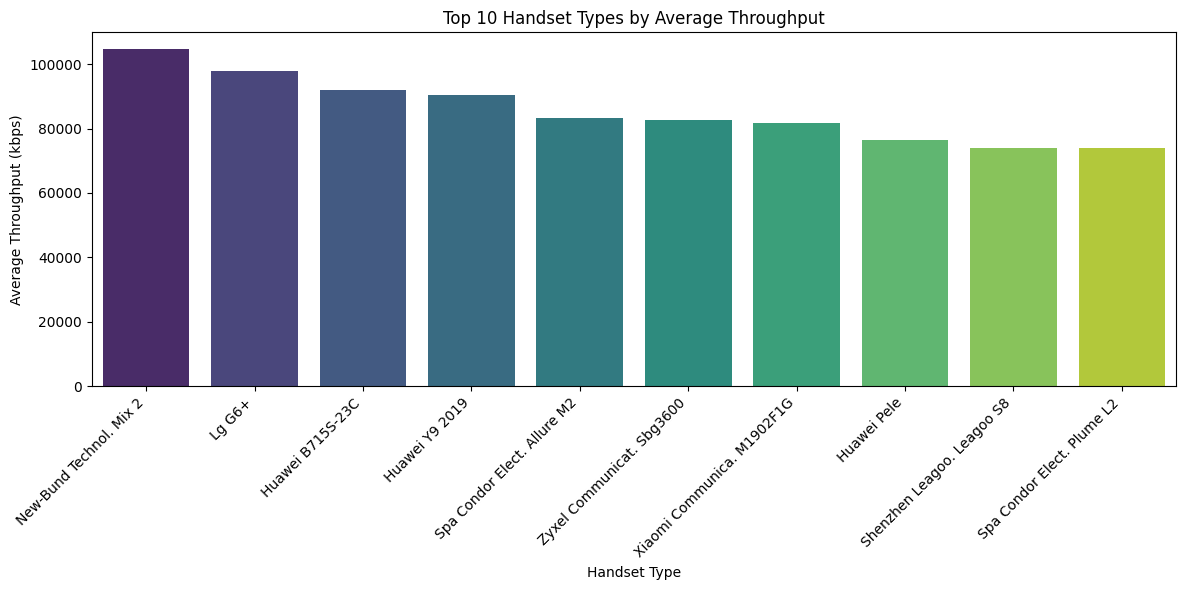

In [42]:
# Visualization: Top 10 Handset Types by Average Throughput
handset_column = 'Handset Type'
throughput_column = 'Avg Bearer TP DL (kbps)'

if handset_column in df.columns and throughput_column in df.columns:
    try:
        # Group by handset type and calculate mean throughput
        throughput_per_handset = df.groupby(handset_column)[throughput_column].mean().reset_index()

        # Sort by throughput and select top 10
        top_10_handsets = throughput_per_handset.nlargest(10, throughput_column)

        # Check if the grouped data is not empty
        if not top_10_handsets.empty:
            # Visualization
            plt.figure(figsize=(12, 6))
            sns.barplot(
                data=top_10_handsets,
                x=handset_column,
                y=throughput_column,
                palette='viridis'
            )
            plt.title('Top 10 Handset Types by Average Throughput')
            plt.xlabel('Handset Type')
            plt.ylabel('Average Throughput (kbps)')
            plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
            plt.tight_layout()  # Adjust layout to prevent label cutoff
            plt.show()
        else:
            print("No data available for visualization.")
    except Exception as e:
        print(f"Error during visualization: {e}")
else:
    print(f"Required columns '{handset_column}' or '{throughput_column}' do not exist in the DataFrame.")
